# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Data Understanding

## About Data
Bright Motor Company want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

## Data Description:
 - **Age:** The age of the individual in years.
 - **Gender:** The gender of the individual, categorized as male or female.
 - **Profession:** The occupation or profession of the individual.
 - **Marital_status:** The marital status of the individual, such as married &, single.
 - **Education:** The educational qualification of the individual Graduate and Post Graduate.
 - **No_of_Dependents:** The number of dependents (e.g., children, elderly parents) that the individual supports financially.
 - **Personal_loan:** A binary variable indicating whether the individual has taken a personal loan "Yes" or "No".
 - **House_loan:** A binary variable indicating whether the individual has taken a housing loan "Yes" or "No".
 - **Partner_working:** A binary variable indicating whether the individual's partner is employed "Yes" or "No".
 - **Salary:** The individual's salary or income.
 - **Partner_salary:** The salary or income of the individual's partner, if applicable.
 - **Total_salary:** The total combined salary of the individual and their partner (if applicable).
 - **Price:** The price of a product or service.
 - **Make:** The type of automobile.

In [4]:
data = pd.read_csv("bright_automotive_company.csv")
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


In [5]:
data.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300.0,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000.0,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900.0,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200.0,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600.0,0.0,31600,31000,Hatchback


In [6]:
r,c = data.shape
print(f"Total Rows are: {r}\nTotal Columns are: {c}\n")

Total Rows are: 1581
Total Columns are: 14



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


In [8]:
print("Statiscal Summary of numerical columns")
data.describe()

Statiscal Summary of numerical columns


,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1568.000000,1475.000000,1581.000000,1581.000000
mean,31.952562,60276.913265,20225.559322,79625.996205,35948.170778
std,8.712549,14636.200199,19573.149277,25545.857768,21175.212108
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59450.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,71700.000000,38300.000000,95900.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


In [9]:
print("Total missing values in each column:")
data.isnull().sum()

Total missing values in each column:


Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [10]:
print("Total duplicate entries: ",len(data[data.duplicated()]))

Total duplicate entries:  0


In [11]:
data['Gender'].value_counts()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [12]:
# Checking for Anomalies or wrong entries
print("Anomalies in 'Age' columns:",len(data[(data['Age']<18) & (data['Age']>90)]))
print("Anomalies in  'Total_salary' columns:",len(data[data['Salary']+data['Partner_salary']!=data['Total_salary']]))

Anomalies in 'Age' columns: 0
Anomalies in  'Total_salary' columns: 119


In the dataset, it contain some null values, anomalies and misspell values.

# Data Cleaning and Transformation

In [13]:
cleaned_data = data.copy()

In [14]:
# Replace '?' to 0
cleaned_data['No_of_Dependents'].replace({'?':0},inplace=True)

# Replace '?' to Mode Make category
cleaned_data['Make'].replace({'?':cleaned_data['Make'].mode()[0]},inplace = True)

# Convert the dtype of 'No_of_Dependents' column
cleaned_data['No_of_Dependents'] = cleaned_data['No_of_Dependents'].astype(int)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 173.1+ KB


C:\Users\deepa\AppData\Local\Temp\ipykernel_11688\3128110230.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['No_of_Dependents'].replace({'?':0},inplace=True)
C:\Users\deepa\AppData\Local\Temp\ipykernel_11688\3128110230.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [15]:
# Replace null gender with mode gender value
cleaned_data.fillna({'Gender':cleaned_data['Gender'].mode()[0]},inplace=True)

# Replace null profession with mode profession value
cleaned_data.fillna({'Profession':cleaned_data['Profession'].mode()[0]},inplace=True)

# Replace null salary with mean salary value
cleaned_data.fillna({'Salary':round(cleaned_data['Salary'].mean(),2)},inplace=True)

# Replace null partner_salary with 0 if partner_working is No otherwise total_salary-salary value
cleaned_data.loc[cleaned_data['Partner_working'] == 'No', 'Partner_salary'] = 0
cleaned_data.loc[cleaned_data['Partner_working'] == 'Yes', 'Partner_salary'] = cleaned_data['Total_salary'] - cleaned_data['Salary']

In [16]:
cleaned_data.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [17]:
cleaned_data['Gender'].value_counts()

Gender
Male      1252
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [18]:
# Speelling check
corrections = {'Femal':'Female','Femle':'Female'}
cleaned_data['Gender'] = cleaned_data['Gender'].replace(corrections)
cleaned_data['Gender'].value_counts()

Gender
Male      1252
Female     329
Name: count, dtype: int64

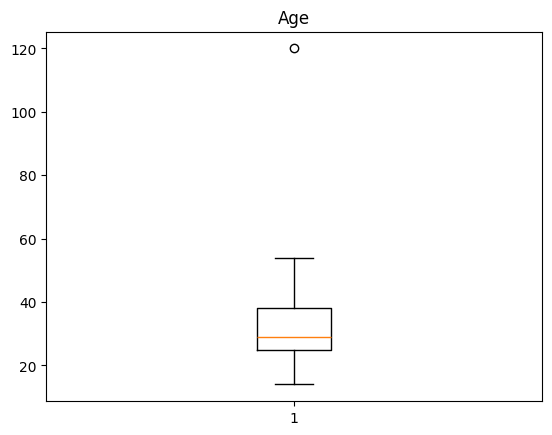

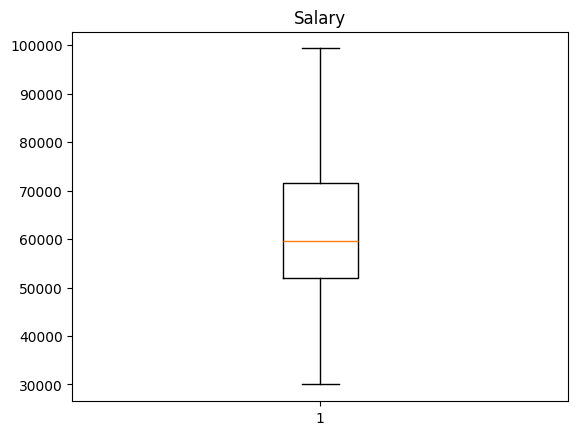

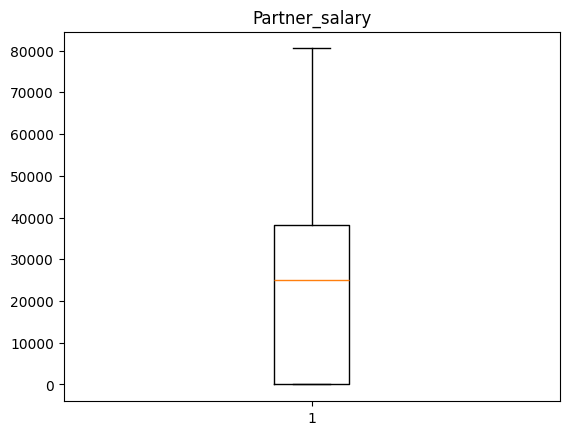

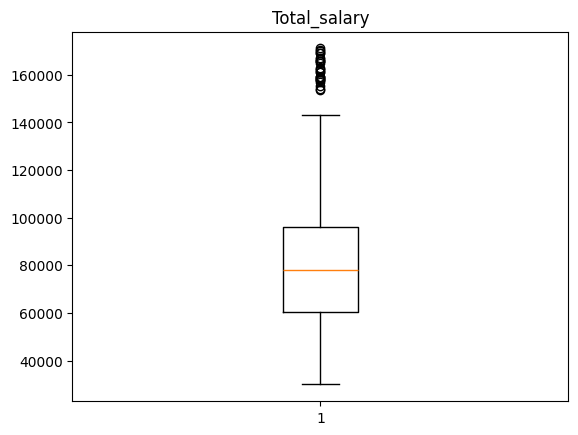

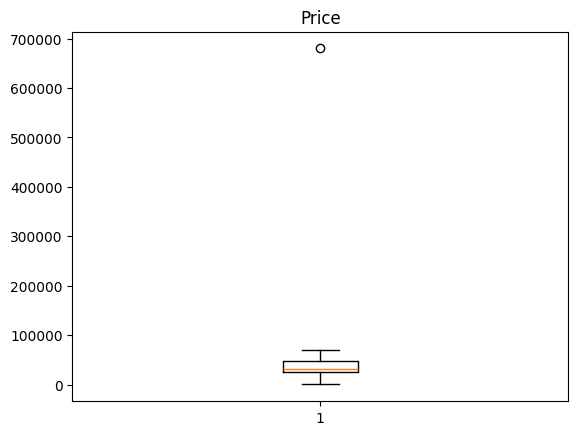

In [19]:
for col in ['Age','Salary','Partner_salary','Total_salary','Price']:
    plt.boxplot(cleaned_data[col])
    plt.title(f"{col}")
    plt.show()


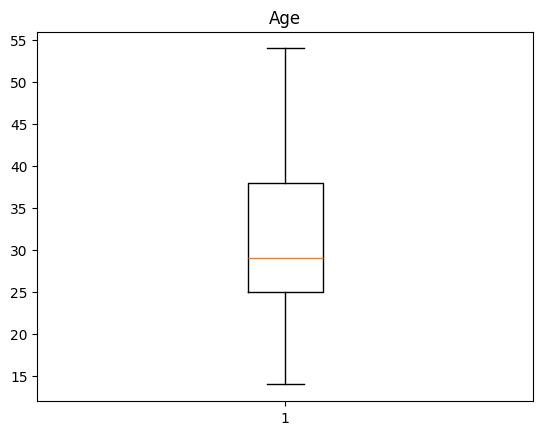

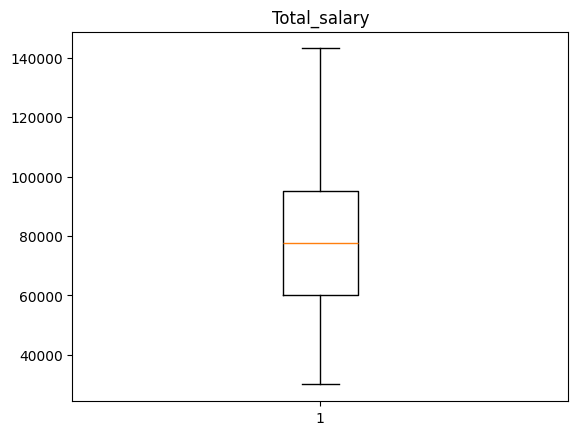

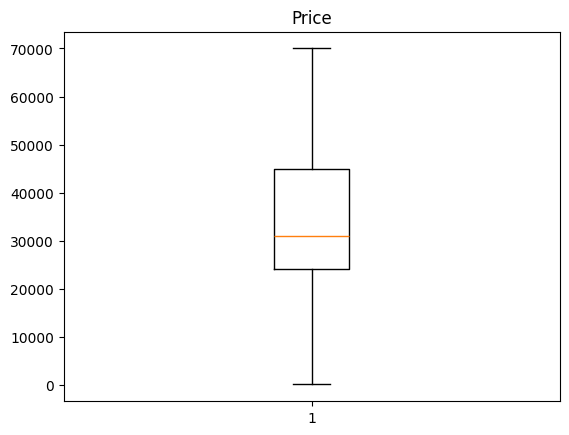

In [20]:
# Remove outliers
for col in ['Age','Total_salary','Price']:
    Q1 = cleaned_data[col].quantile(0.25)
    Q3 = cleaned_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    plt.boxplot(cleaned_data[col])
    plt.title(f"{col}")
    plt.show()


In [21]:
labeled_data = cleaned_data.copy()

In [22]:
LE = LabelEncoder()
for col in labeled_data.select_dtypes(exclude=['int','float']):
    labeled_data[col] =  LE.fit_transform(labeled_data[col])
labeled_data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
3,53,0,1,0,0,0,1,0,1,72500.0,70300.0,142800,61000,2
4,53,1,1,0,1,3,0,0,1,79700.0,60200.0,139900,57000,1
5,53,0,1,0,1,3,0,0,1,79800.0,60500.0,140300,57000,1
6,53,0,1,0,1,3,1,0,1,80900.0,50800.0,131700,51000,1
7,52,1,1,0,0,4,0,0,1,79100.0,40400.0,119500,68000,1


In [23]:
cleaned_data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
3,53,Female,Salaried,Married,Graduate,0,Yes,No,Yes,72500.0,70300.0,142800,61000,Sedan
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV
5,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,79800.0,60500.0,140300,57000,SUV
6,53,Female,Salaried,Married,Post Graduate,3,Yes,No,Yes,80900.0,50800.0,131700,51000,SUV
7,52,Male,Salaried,Married,Graduate,4,No,No,Yes,79100.0,40400.0,119500,68000,SUV


In this section, I handle the null values by mode, mean values or logically imputation. Correct the datatype of 'No_of_Dependent' column and misspell values in gender column. Replace '?' with the relevant value according to the column. Lastly, removed the outliers from the dataset.

# EDA

### What are the mean, median, and standard deviation of the ages of individuals in the dataset?

In [24]:
print(f"Mean: {round(cleaned_data['Age'].mean(),2)}\nMedian: {cleaned_data['Age'].median()}\nMode: {cleaned_data['Age'].mode()[0]}")

Mean: 31.6
Median: 29.0
Mode: 28


### What is the distribution of gender in the dataset? Represent it using a pie chart.

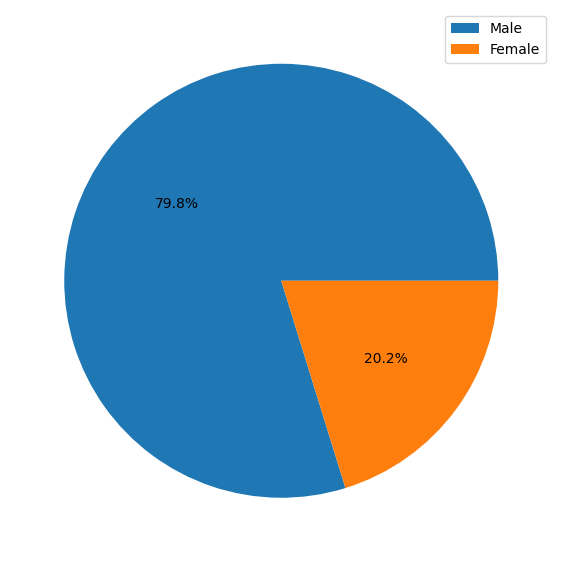

In [25]:
plt.figure(figsize=(7,9))
plt.pie(cleaned_data['Gender'].value_counts(),autopct='%1.1f%%')
plt.legend(['Male','Female'])
plt.show()

Our dataset set is imbalance dataset in term of gender.

### Is there a correlation between age and salary? Provide the correlation coefficient and interpret the result.

In [26]:
numerical_data = cleaned_data.select_dtypes(include=['int','float'])

<Axes: >

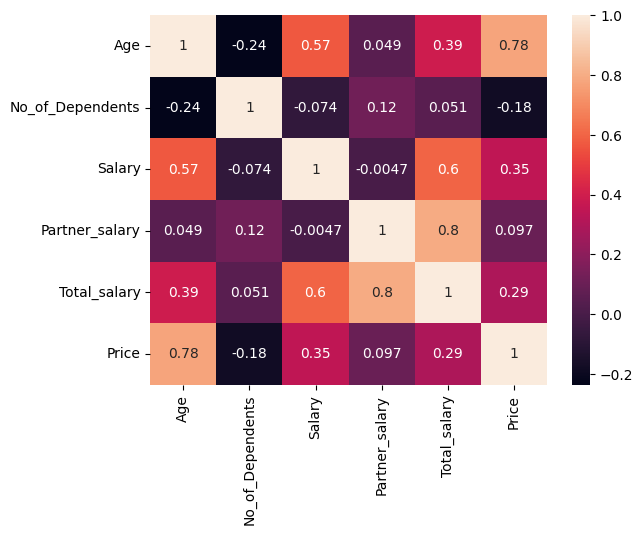

In [27]:
sns.heatmap(numerical_data.corr(),annot = True)

Total salary is strongly influenced by Partner Salary **(0.80)** and Salary **(0.60)**. Age is highly correlated with both Price (0.78) and Salary **(0.57)**. Number of dependents shows **weak or negative** impact on features.

### What is the average salary for individuals based on their educational qualifications (Graduate vs. Post Graduate)?

In [28]:
avg_salary = cleaned_data.groupby(by='Education')['Salary'].mean()
avg_salary

Education
Graduate         48103.741763
Post Graduate    66775.381298
Name: Salary, dtype: float64

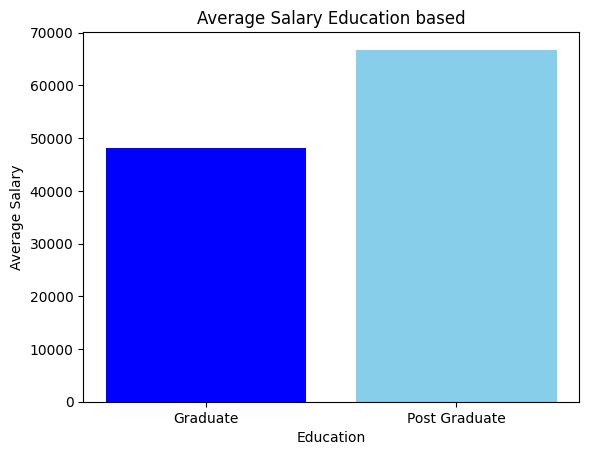

In [29]:
plt.bar(avg_salary.index, avg_salary,color=['blue','skyblue'])
plt.xlabel('Education')
plt.ylabel('Average Salary')
plt.title("Average Salary Education based")
plt.show()

Here, it show that Post Graduate Individuals earn **38.8%** more than a Graduate Individuals. 

### What percentage of individuals have taken a personal loan? How does this compare between males and females?

In [30]:
loan_takers = cleaned_data[cleaned_data['Personal_loan']=='Yes'].groupby(by='Gender')['Personal_loan'].count()
print("Toal Personal Loan takers are: ",loan_takers.sum())
print("Percentage of Male more than female is:",round(((loan_takers[1]-loan_takers[0])/loan_takers[0])*100,2),'%')

Toal Personal Loan takers are:  785
Percentage of Male more than female is: 334.01 %


C:\Users\deepa\AppData\Local\Temp\ipykernel_11688\236113954.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Percentage of Male more than female is:",round(((loan_takers[1]-loan_takers[0])/loan_takers[0])*100,2),'%')


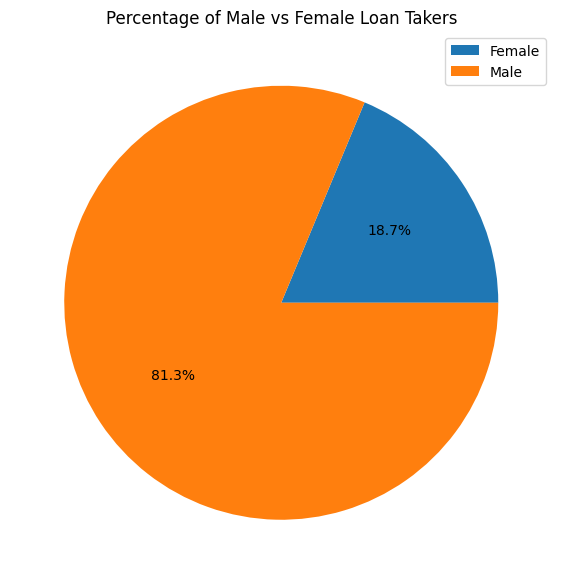

In [31]:
plt.figure(figsize=(7,9))
plt.pie(loan_takers,autopct='%1.1f%%')
plt.legend(labels=loan_takers.index)
plt.title("Percentage of Male vs Female Loan Takers")
plt.show()

Among all individuals, the count of male individuals taking personal loans are **3.34 times** the female individuals.

### What is the average number of dependents for married individuals vs single individuals?

In [32]:
avg_dependent = cleaned_data.groupby(by='Marital_status')['No_of_Dependents'].mean()
avg_dependent

Marital_status
Married    2.522968
Single     1.608696
Name: No_of_Dependents, dtype: float64

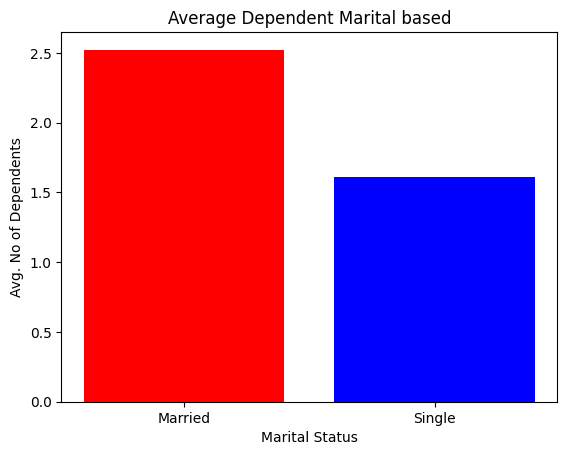

In [33]:
plt.bar(avg_dependent.index, avg_dependent,color=['red','blue'])
plt.xlabel('Marital Status')
plt.ylabel('Avg. No of Dependents')
plt.title("Average Dependent Marital based")
plt.show()

The graph shows that Married individuals have more number of dependent person than Single individuals, which make sense, since, married individuals also, have to take care of their childern, parents, etc. while single individuals doesn't have any children to be taek care. Therefore, Married individuals have more average number of Depenedent than Single individuals. 

### How does the employment status of a partner affect the total combined salary?

In [34]:
salary_data = cleaned_data.groupby('Partner_working')['Total_salary'].mean()
salary_data

Partner_working
No     60527.208976
Yes    93143.452381
Name: Total_salary, dtype: float64

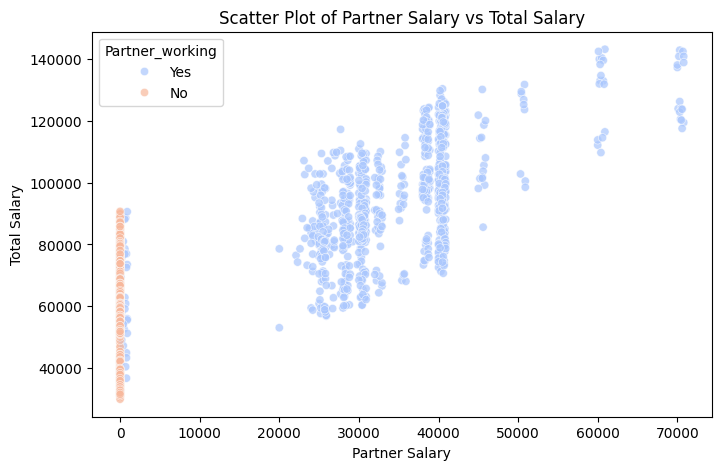

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Partner_salary', y='Total_salary', data=cleaned_data, hue='Partner_working', palette='coolwarm', alpha=0.7)
plt.xlabel('Partner Salary')
plt.ylabel('Total Salary')
plt.title('Scatter Plot of Partner Salary vs Total Salary')
plt.show()

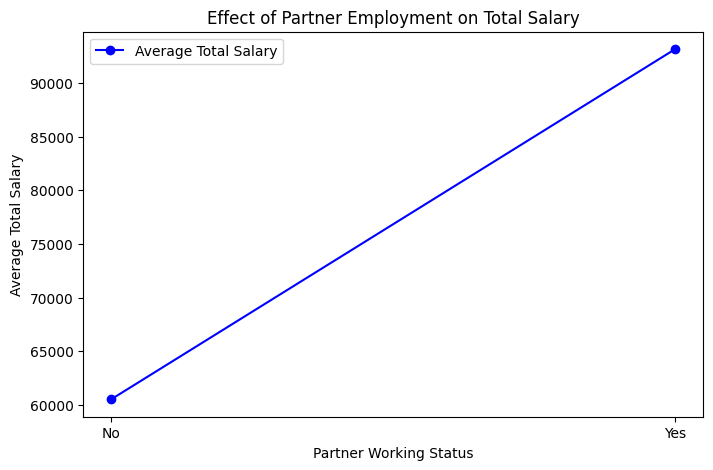

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(salary_data.index, salary_data.values, marker='o', linestyle='-', color='blue', label='Average Total Salary')
plt.xlabel('Partner Working Status')
plt.ylabel('Average Total Salary')
plt.title('Effect of Partner Employment on Total Salary')
plt.legend()
plt.show()

Above, two graphs shows the descent significance difference between the Total Salary of individuals with working partner and without working partner. As, **Individual have working partner then their total salary naturally more than individuals with not working partner**.

### Compare the average salary of individuals whose partners are working versus those whose partners are not working.

In [37]:
avg_salary_data = cleaned_data.groupby('Partner_working')['Salary'].mean()
avg_salary_data

Partner_working
No     60271.528513
Yes    59181.309524
Name: Salary, dtype: float64

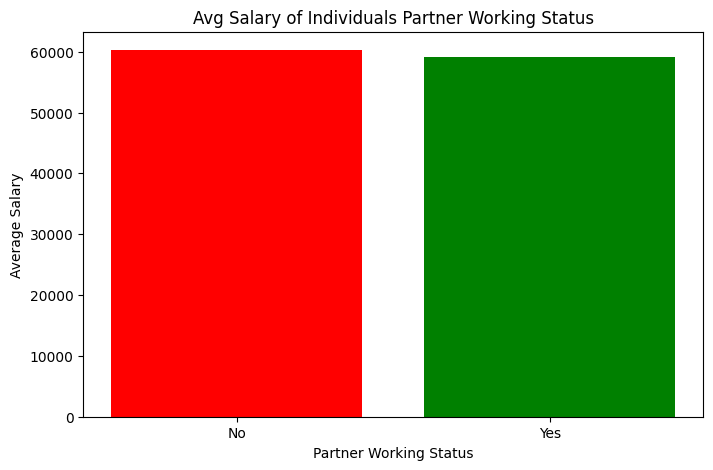

In [38]:
plt.figure(figsize=(8, 5))
plt.bar(avg_salary_data.index,avg_salary_data,color=['red','green'])
plt.xlabel('Partner Working Status')
plt.ylabel('Average Salary')
plt.title('Avg Salary of Individuals Partner Working Status')
plt.show()

This shows that, there is **negligible amount** of difference between average salary of individuals with or without working partner. 

### What is the proportion of individuals with house loans based on their profession?

In [39]:
house_loan = cleaned_data[cleaned_data['House_loan']=='Yes'].groupby(by='Profession')['House_loan'].count()
house_loan

Profession
Business    229
Salaried    298
Name: House_loan, dtype: int64

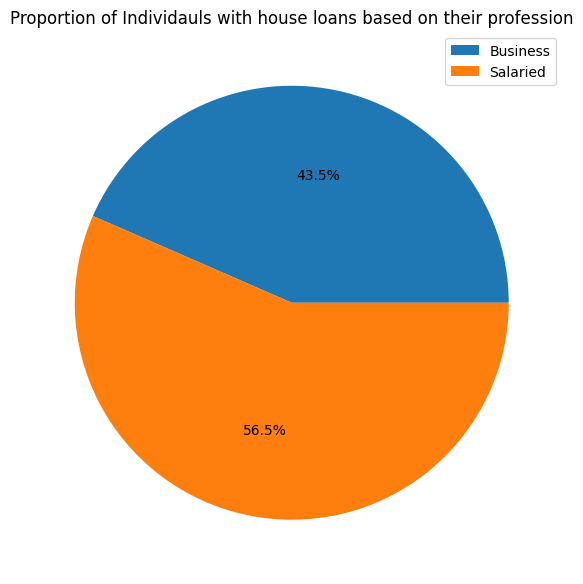

In [40]:
plt.figure(figsize=(7,9))
plt.pie(house_loan,autopct='%1.1f%%')
plt.legend(labels=house_loan.index)
plt.title("Proportion of Individauls with house loans based on their profession")
plt.show()

Here, we can clearly see that, Business Individuals taken **slightly less** house loan than Salaried Individuals. 

### What is the distribution of salaries for individuals with personal loans versus those without personal loans? Represent it using a box plot.

In [41]:
personal_loan_salaries = [group['Salary'].values for _, group in cleaned_data.groupby('Personal_loan')]

C:\Users\deepa\AppData\Local\Temp\ipykernel_11688\846101961.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(personal_loan_salaries, labels=['No Personal Loan', 'Has Personal Loan'])


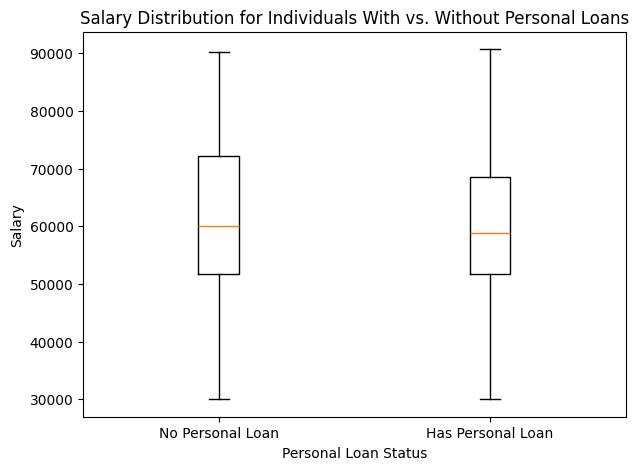

In [42]:
plt.figure(figsize=(7, 5))
plt.boxplot(personal_loan_salaries, labels=['No Personal Loan', 'Has Personal Loan'])
plt.title('Salary Distribution for Individuals With vs. Without Personal Loans')
plt.xlabel('Personal Loan Status')
plt.ylabel('Salary')
plt.show()

The graph shows that individuals **without personal loans** have a **median salary of around ₹60,000**, while those **with personal loans** have a slightly lower **median salary of around ₹58,000**. The **salary range** for both groups spans from approximately **₹30,000 to ₹90,000**, indicating similar overall distribution. This suggests that **personal loan status has minimal impact on salary levels**, with only a slight difference in median values.


### How does the type of automobile relate to the salary of the individuals? Provide insights based on the make of the automobile.

In [43]:
automobile_data = [group['Salary'].values for _,group in cleaned_data.groupby(by='Make')]

C:\Users\deepa\AppData\Local\Temp\ipykernel_11688\3263880889.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(automobile_data,labels=['Hatchback','SUV','Sedan'])


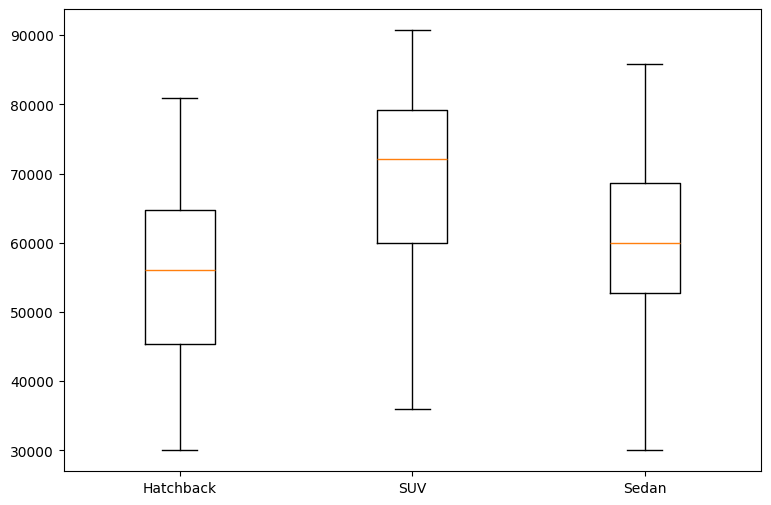

In [44]:
plt.figure(figsize=(9,6))
plt.boxplot(automobile_data,labels=['Hatchback','SUV','Sedan'])
plt.show()

The graph shows that individuals owning **SUVs** have the **highest median salary of around ₹72,000**, followed by **Sedan owners** with a **median salary of about ₹61,000**, and **Hatchback owners** with the **lowest median salary of approximately ₹57,000**. Salary ranges are also widest for SUV owners (₹36,000 to ₹91,000), compared to Hatchback (₹30,000 to ₹81,000) and Sedan (₹30,000 to ₹86,000) owners. This suggests that higher-income individuals are more likely to own SUVs.

### What is the average price of the product/service in the dataset? How does this price vary based on the individual's total salary?

In [45]:
print(f"Average Price of the Service are:\n{round(cleaned_data.groupby('Make')['Price'].mean(),2)}")

Average Price of the Service are:
Make
Hatchback    26474.23
SUV          54932.80
Sedan        34673.30
Name: Price, dtype: float64


<Figure size 1200x600 with 0 Axes>

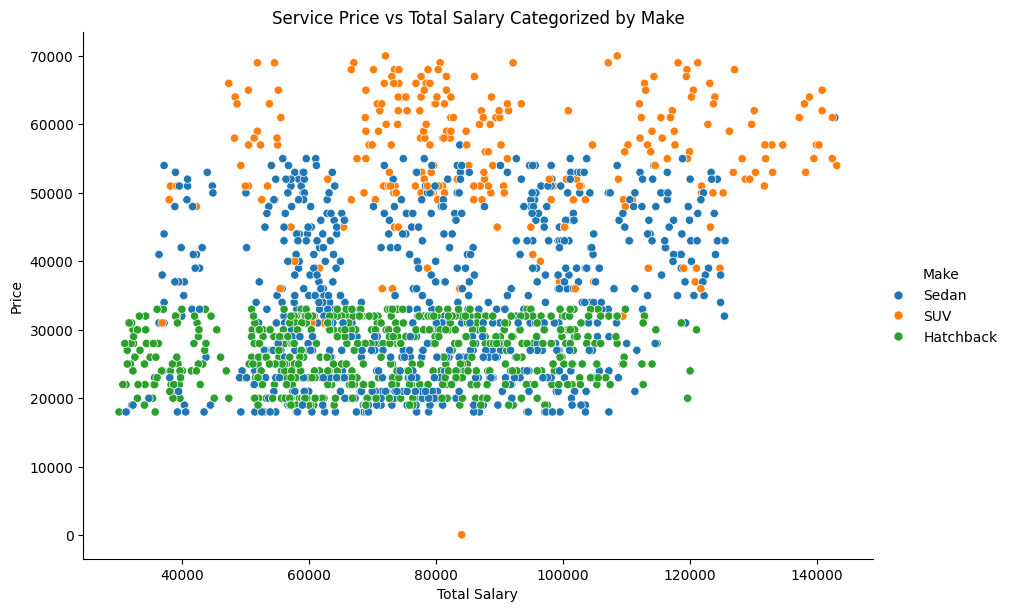

In [81]:
plt.figure(figsize=(12, 6))
sns.relplot(x="Total_salary", y="Price", hue="Make", data=cleaned_data, kind="scatter", height=6, aspect=1.5)
plt.xlabel("Total Salary")
plt.ylabel("Price")
plt.title("Service Price vs Total Salary Categorized by Make")
plt.show()

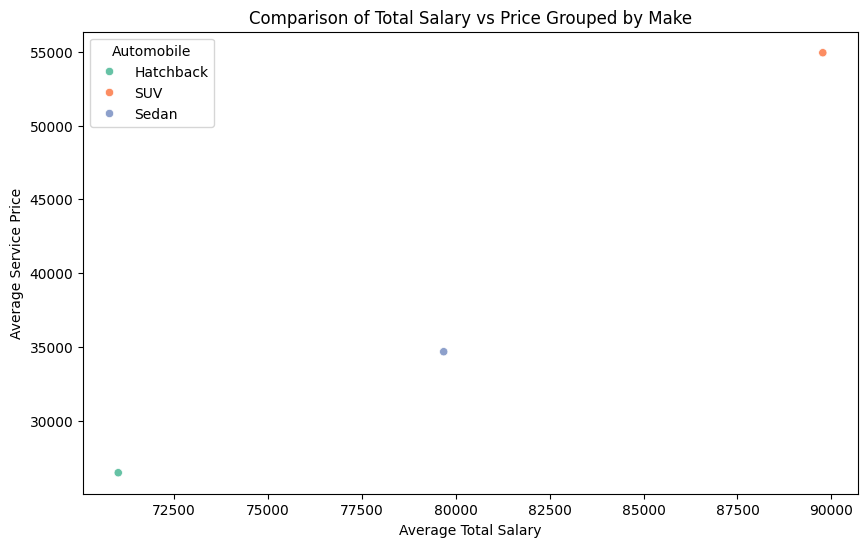

In [47]:
grouped_data = cleaned_data.groupby('Make').agg({'Total_salary': 'mean', 'Price': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=grouped_data['Total_salary'], y=grouped_data['Price'], hue=grouped_data['Make'], palette='Set2')
plt.xlabel('Average Total Salary')
plt.ylabel('Average Service Price')
plt.title('Comparison of Total Salary vs Price Grouped by Make')
plt.legend(title='Automobile')

plt.show()


The Scatter plot shows the individuals with **Hatchback have lowest** service price than SUV & Sedan since, it is cheapest among the three automobiles. While, **SUV have highest** service price than Hatchback & Sedan since, it is costlier than Sedan & Hatchback.

While the 2nd scatter plot shows, the linearity relationship between Service Price and Total Salary. **It show, that as the individuals total salary increases individuals goes toward luxuriers automobile which make the Service Price to be increased**. 

### Is there a significant difference in the number of personal loans taken by married individuals compared to single individuals?

In [50]:
personal_loans = cleaned_data[cleaned_data['Personal_loan']=='Yes'].groupby('Marital_status')['Personal_loan'].count()
personal_loans

Marital_status
Married    713
Single      72
Name: Personal_loan, dtype: int64

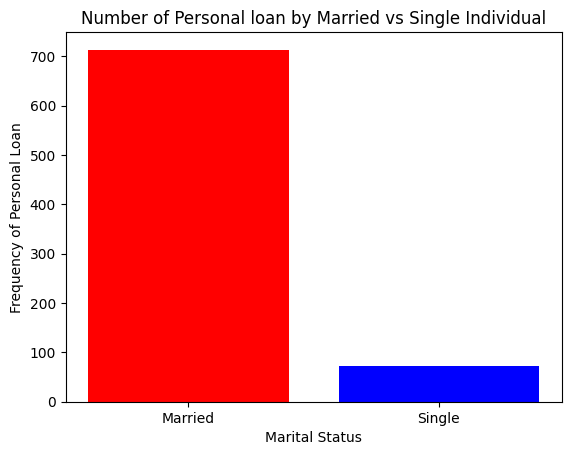

In [51]:
plt.bar(personal_loans.index, personal_loans,color=['red','blue'])
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Personal Loan')
plt.title("Number of Personal loan by Married vs Single Individual")
plt.show()

The above graph show the frequency of Personal loan taken by Married V/S Single individuals. Here, Married individuals takes **8.9 times** Personal Loans then Single individuals.

### How does educational qualification impact the likelihood of taking a house loan?

In [52]:
education_loan_counts = cleaned_data[cleaned_data['House_loan']=='Yes'].groupby('Education')['House_loan'].count()
print(education_loan_counts)
print(f"Percentage of House loan taken by UG Individuals compared to PG Individuals is:{round((education_loan_counts.iloc[1]-education_loan_counts.iloc[0])/education_loan_counts.iloc[0]*100,2)}%")

Education
Graduate         202
Post Graduate    325
Name: House_loan, dtype: int64
Percentage of House loan taken by UG Individuals compared to PG Individuals is:60.89%


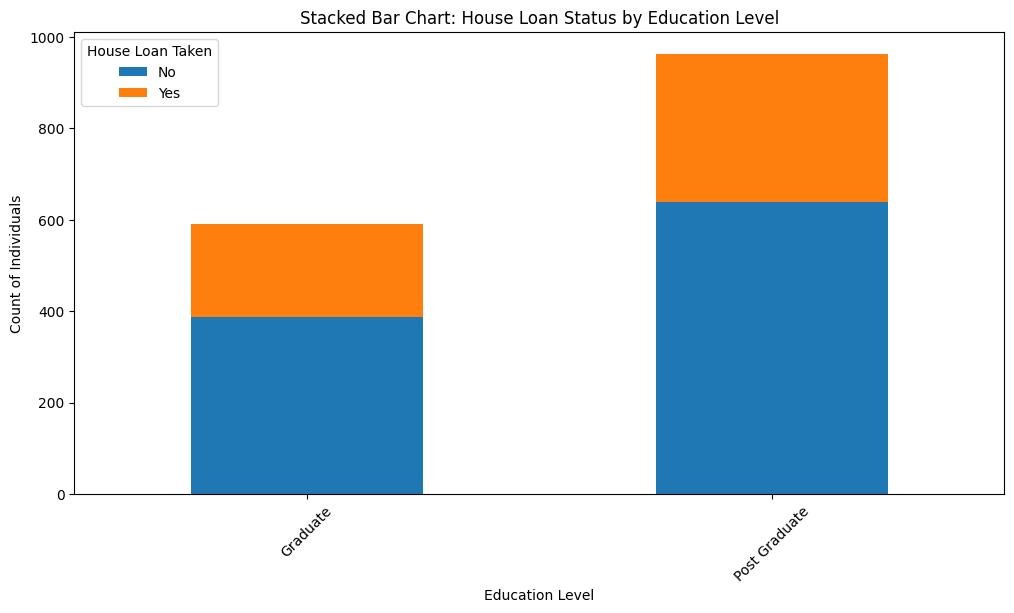

In [53]:
education_loan_counts = pd.crosstab(cleaned_data["Education"], cleaned_data["House_loan"])

# Plot the stacked bar chart
education_loan_counts.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.xlabel("Education Level")
plt.ylabel("Count of Individuals")
plt.title("Stacked Bar Chart: House Loan Status by Education Level")
plt.legend(title="House Loan Taken")
plt.xticks(rotation=45)
plt.show()

PG individuals take more house loans than UG individuals because they generally have **higher salaries**, **better credit scores**, **more job stability**, and are at a **life stage** where homeownership becomes a priority.


### Analyze the number of dependents based on the profession of the individual. Which profession has the highest average number of dependents?

In [54]:
profession_dependents_counts = cleaned_data.groupby('Profession')['No_of_Dependents'].mean()
profession_dependents_counts

Profession
Business    2.481536
Salaried    2.410959
Name: No_of_Dependents, dtype: float64

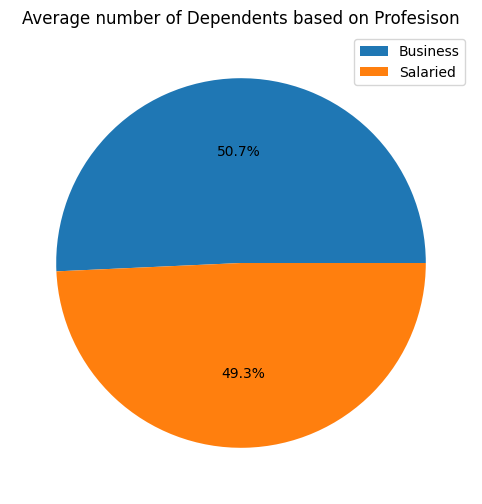

In [55]:
plt.figure(figsize=(10,6))
plt.pie(profession_dependents_counts,autopct='%1.1f%%')
plt.title('Average number of Dependents based on Profesison')
plt.legend(labels=profession_dependents_counts.index)
plt.show()

So, it is clear than Business professionals have **slightly more (i.e. 1.4%)** average no of dependents than Salaried professionals.

### Is there a significant difference in salaries between males and females? Provide statistical evidence.

In [56]:
gender_based_salary = cleaned_data.groupby('Gender')['Salary'].describe()
gender_based_salary

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,314.0,64651.322548,13380.494098,34800.0,56050.0,63050.0,76075.0,90700.0
Male,1239.0,58422.424980,13873.466699,30000.0,51050.0,58300.0,68500.0,89900.0


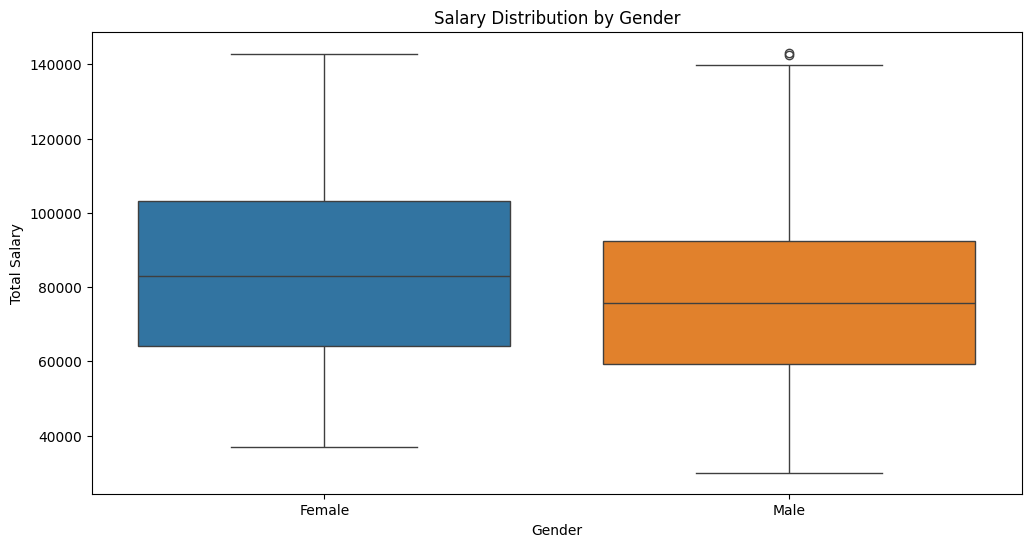

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Gender", y="Total_salary", data=cleaned_data,hue='Gender')
plt.xlabel("Gender")
plt.ylabel("Total Salary")
plt.title("Salary Distribution by Gender")
plt.show()

The boxplot reveals that **females generally have a higher median salary** than , indicating a possible gender pay gap. There is also **greater salary variability among females**, with wider interquartile ranges. This suggests that female salaries are more dispersed, while male salaries are relatively clustered in a narrower range.

### How does having a personal loan affect the total combined salary of the individual and their partner?

In [58]:
salary_by_loan = cleaned_data.groupby("Personal_loan")["Total_salary"].mean()
print(salary_by_loan)

Personal_loan
No     78927.604167
Yes    77426.751592
Name: Total_salary, dtype: float64


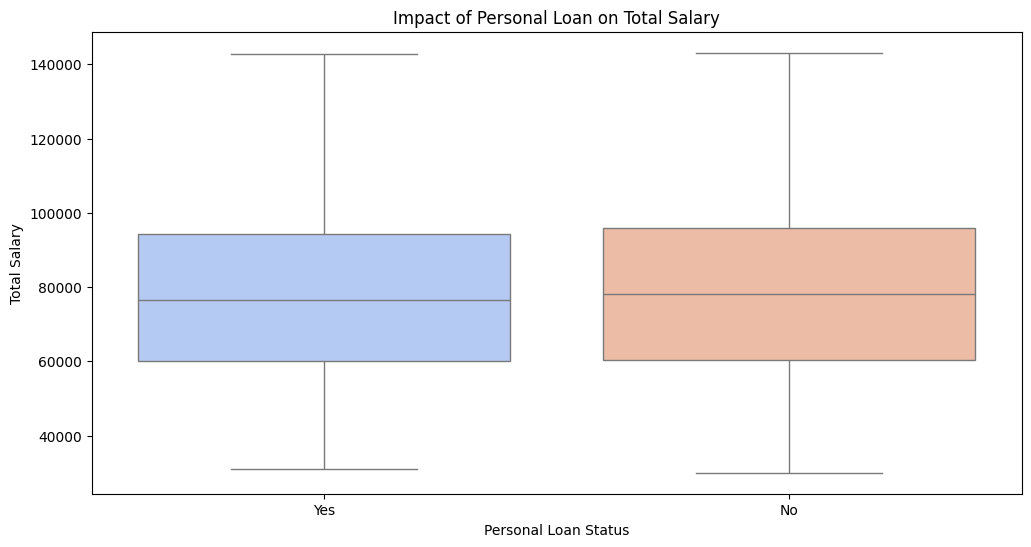

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Personal_loan", y="Total_salary", data=cleaned_data, hue='Personal_loan',palette="coolwarm")
plt.xlabel("Personal Loan Status")
plt.ylabel("Total Salary")
plt.title("Impact of Personal Loan on Total Salary")
plt.show()


Here, we can see that average combined salary of individual and their partner **with personal loan is slightly less than without personal loan**.

From the boxplot, we can understand that Individuals with a working partner generally have higher total salaries, regardless of their personal loan status. **Personal loan status shows minimal impact on total salary**.

### What is the average partner's salary for individuals with and without house loans?

In [60]:
houseLoan_partner_salary = cleaned_data.groupby('House_loan')['Partner_salary'].mean()
round(houseLoan_partner_salary,2)

House_loan
No     18366.08
Yes    18376.85
Name: Partner_salary, dtype: float64

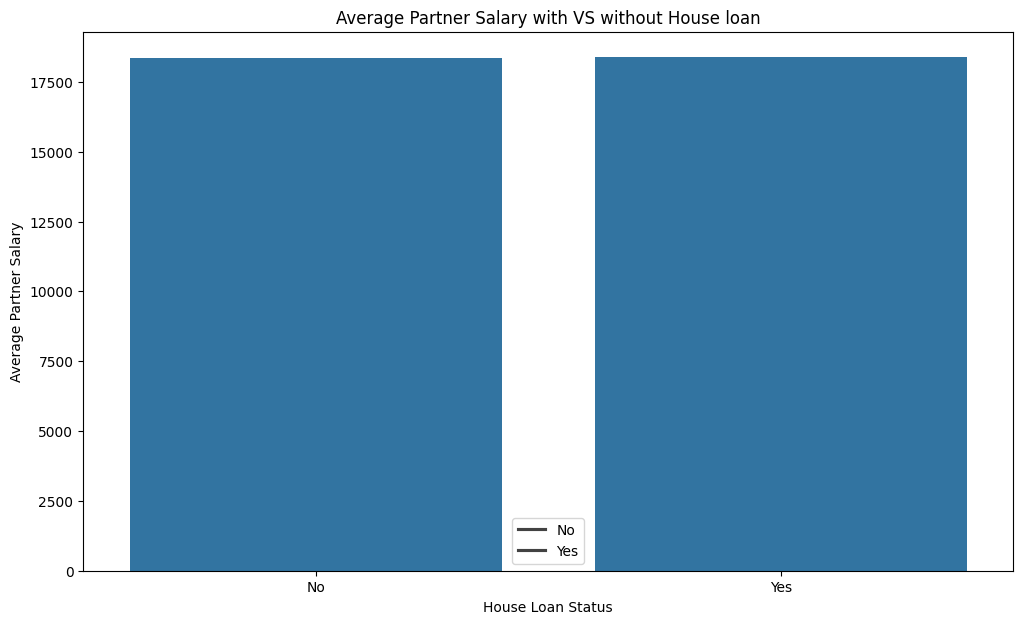

In [61]:
plt.figure(figsize=(12,7))
sns.barplot(houseLoan_partner_salary,)
plt.legend(labels=houseLoan_partner_salary.index)
plt.xlabel('House Loan Status')
plt.ylabel('Average Partner Salary')
plt.title('Average Partner Salary with VS without House loan')
plt.show()

The bar chart shows that the **average partner salary is nearly identical** for individuals **with and without a house loan**, both around **₹18,370**. This indicates that **house loan status does not significantly impact partner salary levels**.

### Create a histogram showing the distribution of total combined salaries. Identify and discuss any skewness or outliers in the data.

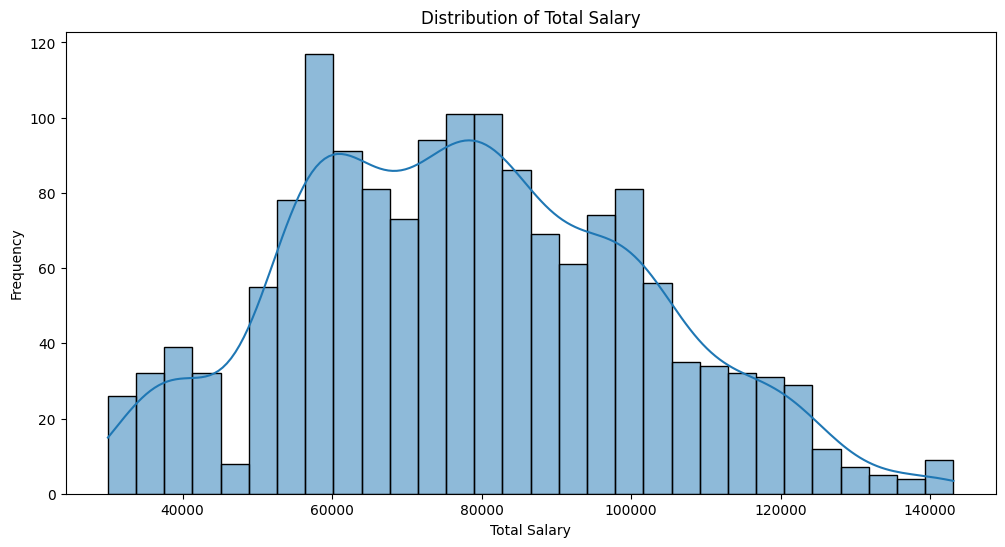

In [62]:
plt.figure(figsize=(12,6))
sns.histplot(x='Total_salary',bins=30,data=cleaned_data,kde=True)
plt.xlabel('Total Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Total Salary')
plt.show()

The histogram shows the **distribution of total salary**, which is **right-skewed**, indicating more individuals earn **between ₹55,000 and ₹85,000**, with the **peak frequency around ₹60,000–₹65,000**. Salaries gradually decrease beyond ₹100,000, with fewer individuals earning above ₹120,000. 

The values at **extremely right or left are outliers** (But, I already removed the possible outlier).

# Model Building

### Build a regression model to predict an individual's salary based on age, education, and number of dependents. Discuss the model's accuracy and significance.

In [63]:
X = labeled_data[['Age','Education','No_of_Dependents']]
y = labeled_data['Salary']

In [64]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Apply Ridge Regression
ridge = Ridge(alpha=0.4)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))
print(f"Ridge Regression RMSE: {round(ridge_rmse,3)}")
normalized_rmse = ridge_rmse / (max(y_test) - min(y_test))
print(f"Normalized RMSE: {round(normalized_rmse,3)}")

Ridge Regression RMSE: 7165.657
Normalized RMSE: 0.121


The Ridge Regression model was trained using three features: **Age**, **Education**, and **No\_of\_Dependents**, to predict **Salary**.

Here are the results:

* **Ridge Regression RMSE** (Root Mean Squared Error): **7165.657**
  → This means the average prediction error in salary is about ₹7,166.

* **Normalized RMSE**: **0.121**
  → The error is **12.1%** of the range of actual salaries, which indicates a **reasonably good fit**, especially for basic linear models.


# Testing

In [80]:
sample = pd.DataFrame([[53,0,3]],columns=['Age','Education','No_of_Dependents'])
pred = ridge.predict(sample)
print(round(pred[0],2))

69249.5


# Conclusion

The analysis of the **Bright Motor Company dataset** provided some insights and predictive modeling:  

- Salaries tend to increase with age and education, but other factors may influence earnings.
- It show, that as the individuals total salary increases individuals goes toward luxuriers automobile which make the Service Price to be increased.
- Salaried individuals take more loans than business owners due to stable income and easier loan approvals.
- Higher education and age correlated with increased salaries, but dependents showed minimal effect.


**Predictive Modeling using Ridge Regression:**  
   - A **Ridge Regression model** was built to predict salary based on **Age, Education, and Number of Dependents**.  
   - Model evaluation showed an **RMSE of ₹7,166** and a **Normalized RMSE of 0.121**, indicating **a reasonably good fit** for a basic regression approach.  
   - The **low error percentage (12.1%)** suggests the model captures salary trends fairly well.  
